# Limpeza de dados em um dataset real (titanic)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
titanic = pd.read_csv('train.csv')

In [4]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
titanic.shape

(891, 12)

In [6]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
titanic.Embarked.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype 
--------------  ----- 
889 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


* Embarked: 
1) C = Cherbourg 
2) Q = Queenstown
3) S = Southampton

* E se eu quisesse saber a quantidade de pessoas que embarcou em cada lugar?

In [8]:
embarques = titanic["Embarked"].value_counts()
embarques

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

* Legal que ele reconhece cada valor como diferente e faz a soma das repetições sozinho...

* Será que local de embarque tem relação com o tipo do ticket?

In [9]:
embarque_por_ticket = titanic.groupby('Embarked')['Pclass'].apply(list)
embarque_por_ticket

Embarked
C    [1, 2, 3, 3, 1, 1, 1, 3, 3, 3, 2, 3, 1, 1, 3, ...
Q    [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...
S    [3, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 2, 2, 3, ...
Name: Pclass, dtype: object

* Procurando uma forma mais bonita de visualizar as classes médias

In [53]:
embarque_por_ticket = titanic.groupby('Embarked')['Pclass'].value_counts()
embarque_por_ticket

Embarked  Pclass
C         1          85
          3          66
          2          17
Q         3          72
          2           3
          1           2
S         3         353
          2         164
          1         127
Name: count, dtype: int64

In [50]:
embarque_por_ticket_moda = titanic.groupby('Embarked')['Pclass'].agg(pd.Series.mode)
embarque_por_ticket_moda

Embarked
C    1
Q    3
S    3
Name: Pclass, dtype: int64

In [51]:
embarque_por_ticket_media = titanic.groupby('Embarked')['Pclass'].agg(pd.Series.mean)
embarque_por_ticket_media

Embarked
C    1.886905
Q    2.909091
S    2.350932
Name: Pclass, dtype: float64

In [52]:
embarque_por_ticket_mediana = titanic.groupby('Embarked')['Pclass'].agg(pd.Series.median)
embarque_por_ticket_mediana

Embarked
C    1.0
Q    3.0
S    3.0
Name: Pclass, dtype: float64

* Será que se pode concluir que a região de Queenstown é mais pobre? Nela tiveram mais embarques com ticket de terceira classe...

* Usando a dica da Carol para a soma dos valores nulos

In [10]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Qual classe foi mais recorrente?

In [11]:
rec_Pclass = titanic['Pclass'].mode()
rec_Pclass

0    3
Name: Pclass, dtype: int64

* Excluindo a coluna Cabine por ela ser irrelevante e conter muitos valores NaN

In [12]:
del titanic['Cabin']

* Resolvendo os valores nulos na coluna Embarked

In [13]:
embarked_por_survived = titanic.loc[(titanic['Survived'] == 1) & (titanic['Embarked'].isnull())]
embarked_por_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [14]:
not_null_embarked = titanic.dropna(subset=['Embarked'])

* Qual deve ser a diferença entre PassengerId e Ticket?

In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [16]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Verificando novamente a existência de valores nulos em cada coluna

In [17]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [18]:
titanic[titanic.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


* Substituindo os valores faltantes de idade pela mediana dos valores.

1) Calculando a mediana da coluna Age
2) Fazendo um filtro que substitui os valores faltantes pela média anteriormente calculada

In [19]:
median_age = titanic['Age'].median()
titanic['Age'].fillna(median_age, inplace = True)

In [20]:
titanic[titanic.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [21]:
titanic.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

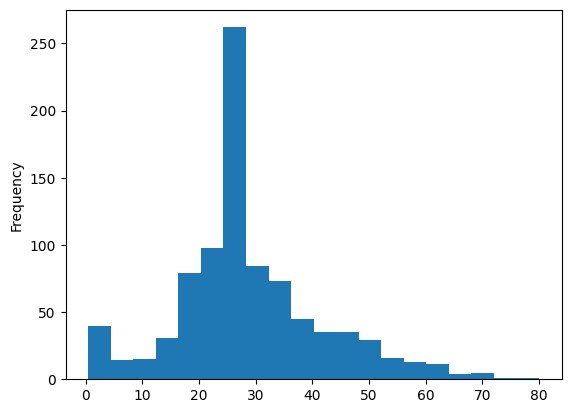

In [22]:
titanic.Age.plot.hist(bins=20);

In [23]:
titanic.Age.median()

28.0

In [24]:
titanic.groupby('Pclass')['Age'].median()

Pclass
1    35.0
2    28.0
3    28.0
Name: Age, dtype: float64

In [25]:
titanic.groupby(['Pclass','Sex'])['Age'].median()

Pclass  Sex   
1       female    32.5
        male      36.0
2       female    28.0
        male      29.0
3       female    28.0
        male      28.0
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

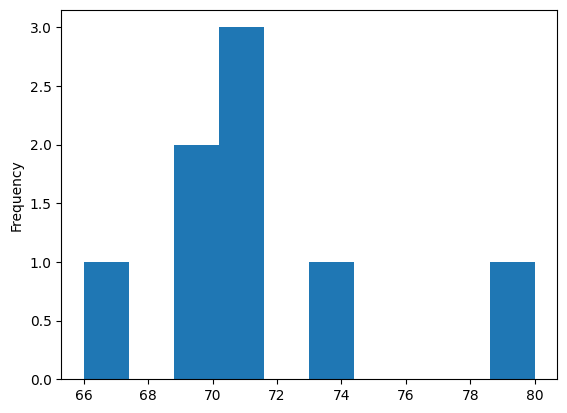

In [26]:
old = titanic[titanic['Age'] > 65]

old['Age'].plot(kind='hist')

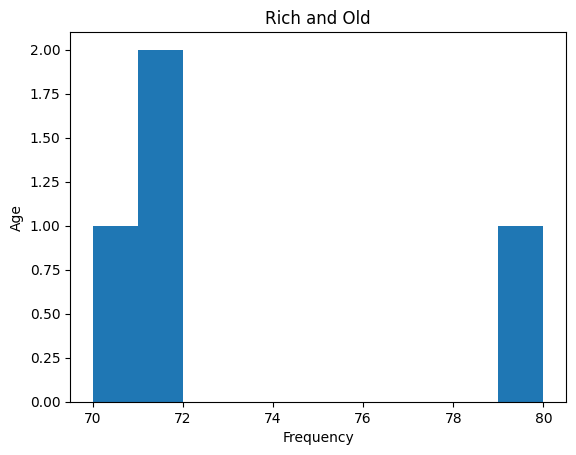

In [27]:
old_and_rich = titanic[(titanic['Age'] > 65) & (titanic['Pclass'] == 1)]

old_and_rich['Age'].plot(kind='hist', bins=10)

plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Rich and Old');

* Criando um filtro de sobrenome para tentar descobrir se existe relação entre número de sobreviventes e sobrenomes

In [28]:
# O que faz esse lambda nome?
titanic['Surname'] = titanic['Name'].apply(lambda nome: nome.split(',')[0])

titanic['Surname']

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Surname, Length: 891, dtype: object

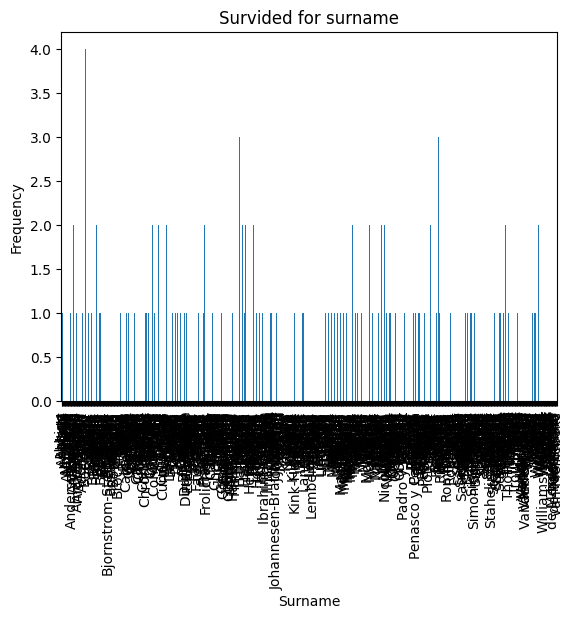

In [29]:
survived4surname = titanic.groupby('Surname')['Survived'].sum()

survived4surname.plot(kind='bar')

plt.xlabel('Surname')
plt.ylabel('Frequency')
plt.title('Survided for surname');

* O gráfico anterior ficou ilegível, mas e se eu colocasse apenas os sobreviventes maiores do que 2?

* A partir do valor de sobrenomes somados, posso ver quais tiveram número de sobreviventes maior do que 2 para tentar deixar o gráfico menos poluído e mais real, afinal, o objetivo é saber quais famílias saíram ilesas do desastre

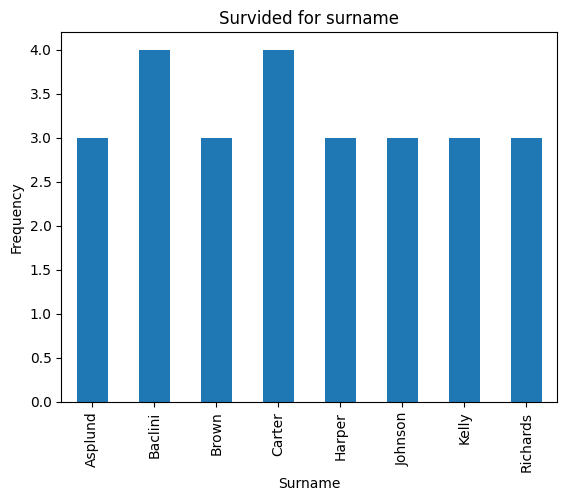

In [30]:
max_survived = survived4surname[survived4surname > 2]

max_survived.plot(kind='bar')

plt.xlabel('Surname')
plt.ylabel('Frequency')
plt.title('Survided for surname');

* Agora sabemos que o máximo de pessoas que sobreviveu em uma família foram 4.

In [31]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen


* Verificando novamente valores nulos

In [32]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Surname        0
dtype: int64

* Verificando outliers

In [33]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Verificando a taxa de valores máxima para a coluna Fare

In [34]:
titanic[titanic.Fare == titanic.Fare.max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Surname
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,Ward
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,Cardeza
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,Lesurer


**Analisando a base final**

In [35]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen


* Removendo as colunas de PassengerId e Ticket

In [36]:
titanic = titanic.drop(['PassengerId','Ticket'],axis=1)

In [37]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Surname
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Braund
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Cumings
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Heikkinen
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Futrelle
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Allen


In [38]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
 9   Surname   891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB
